In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

In [218]:
df = pd.read_csv(r"C:\Users\Vijay_k943wj6\Desktop\DataTry1\Data Science try\drug200.csv")

In [219]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [220]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


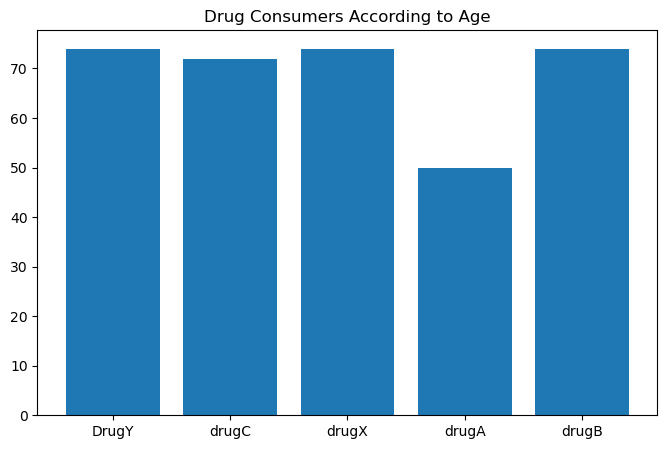

In [222]:
plt.figure(figsize = (8,5))
plt.bar(df['Drug'], df['Age'])
plt.title('Drug Consumers According to Age');

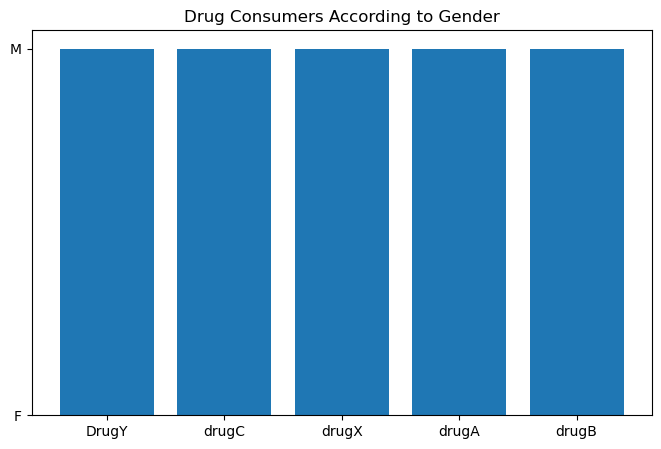

In [223]:
plt.figure(figsize = (8,5))
plt.bar(df['Drug'], df['Sex'])
plt.title('Drug Consumers According to Gender');

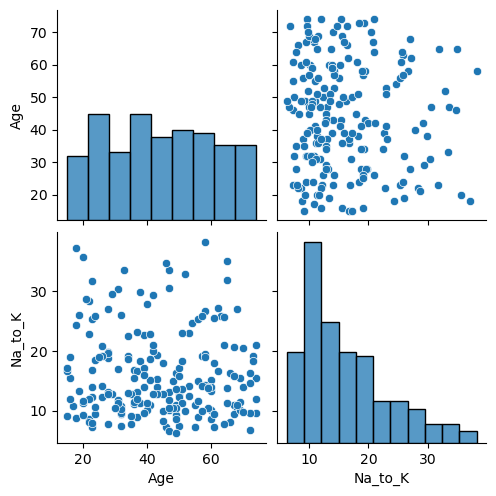

In [224]:
sns.pairplot(df);

In [225]:
cat_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']

In [226]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [227]:
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


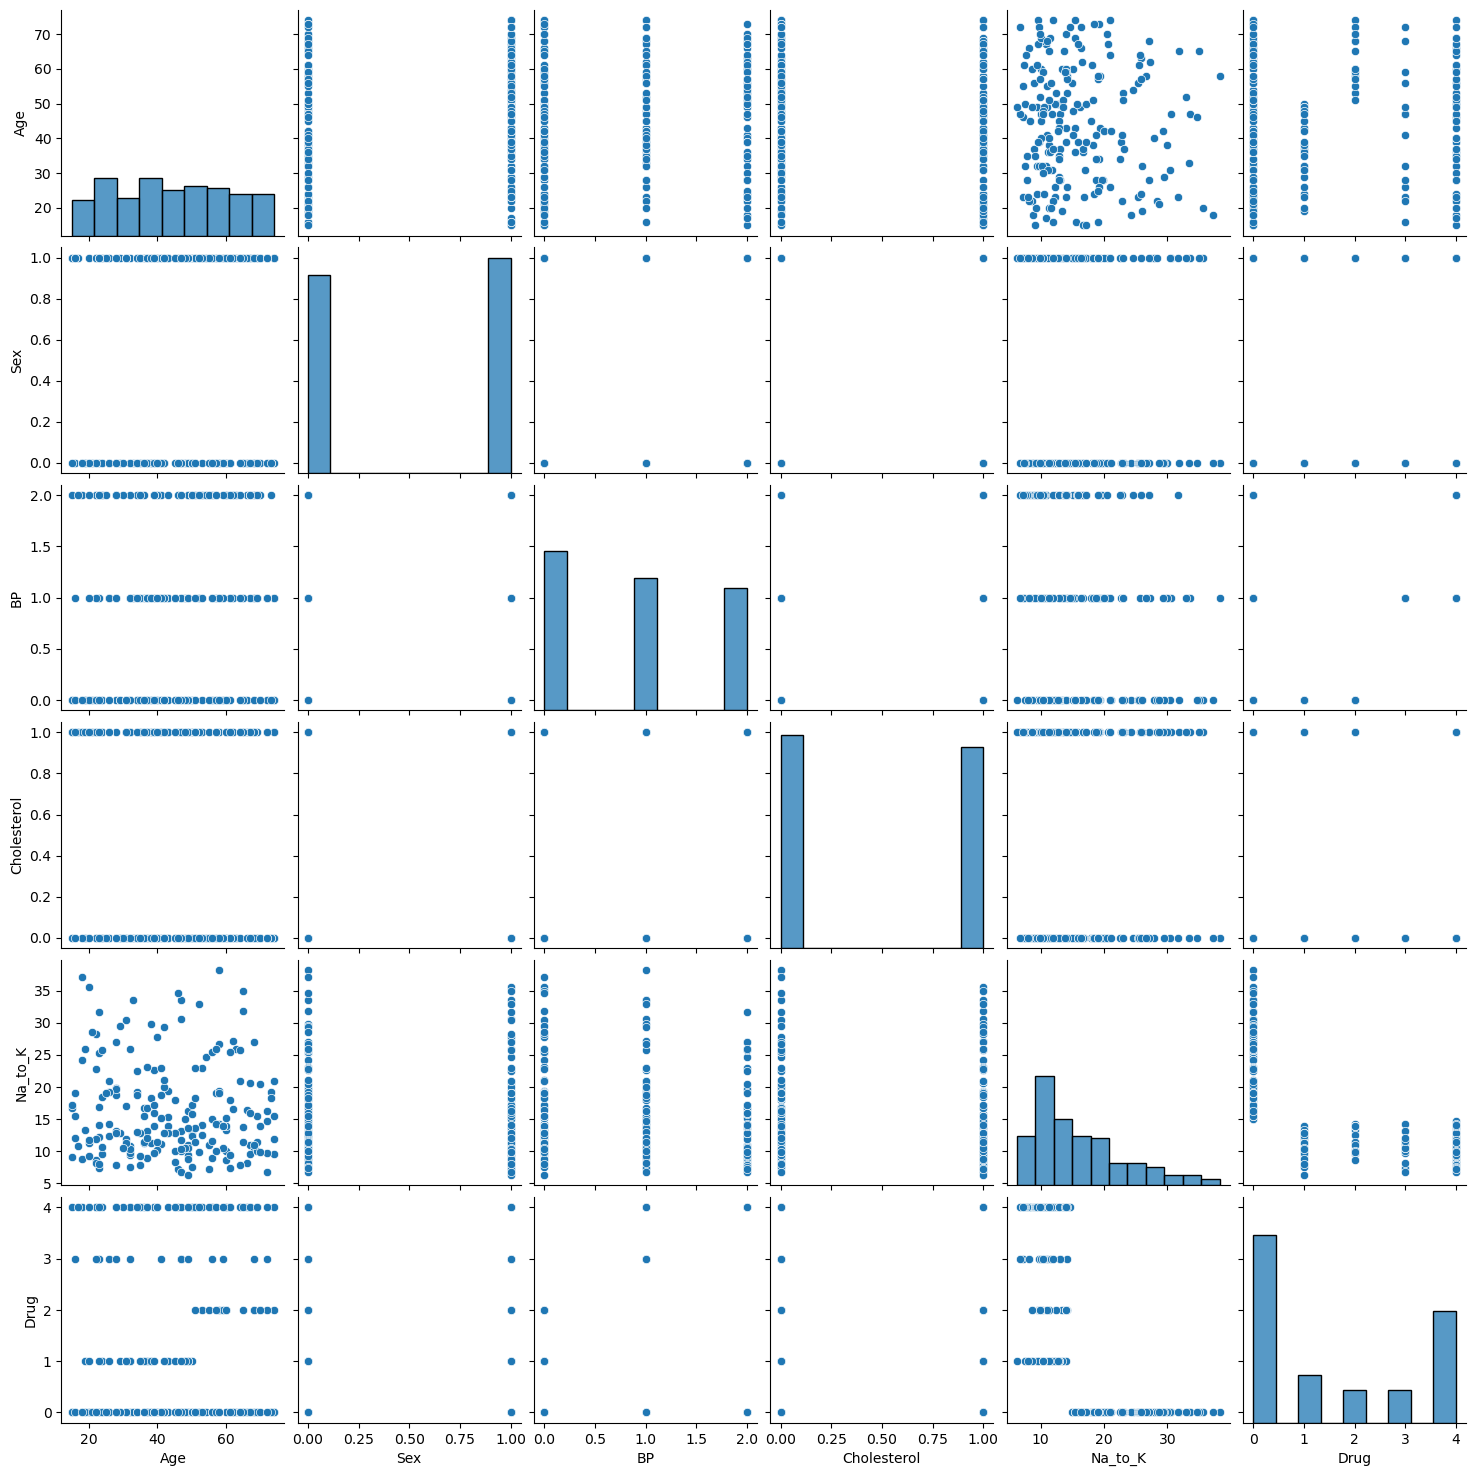

In [229]:
sns.pairplot(df);

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [231]:
x = df.drop('Drug', axis=1)
y = df['Drug']

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 45)

In [233]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [234]:
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

In [235]:
y_train_s.to_frame().value_counts()

Drug
0       64
1       64
2       64
3       64
4       64
Name: count, dtype: int64

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train_s)

In [238]:
x_train = pd.DataFrame(x_train, columns = x.columns)

In [239]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,-0.971491,1.155754,-0.935486,1.441153,0.718171
1,1.224152,-0.865236,0.412962,1.441153,0.108478
2,-0.648603,-0.865236,-0.935486,-0.693889,-0.366529
3,0.320063,1.155754,-0.935486,-0.693889,0.944682
4,1.030418,1.155754,1.761410,-0.693889,0.630412


In [240]:
x_test=scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns = x.columns)

## Naive Bayes

In [241]:
model = GaussianNB()
model.fit(x_train, y_train_s)

GaussianNB()

In [242]:
y_preds = model.predict(x_train)

In [243]:
accuracy = accuracy_score(y_train_s, y_preds)

In [244]:
print(accuracy)

0.915625


In [245]:
y_pred = model.predict(x_test)

In [246]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8833333333333333


In [247]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        27
           1       0.78      1.00      0.88         7
           2       0.71      1.00      0.83         5
           3       0.67      1.00      0.80         4
           4       1.00      0.94      0.97        17

    accuracy                           0.88        60
   macro avg       0.82      0.94      0.87        60
weighted avg       0.91      0.88      0.89        60



## Logistic Regression 

In [248]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train_s)

LogisticRegression()

In [249]:
y_pred=LR.predict(x_train)

In [250]:
accuracy=accuracy_score(y_train_s,y_pred)
accuracy

0.96875

In [251]:
report = classification_report(y_train_s, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.98      1.00      0.99        64
           2       0.97      1.00      0.98        64
           3       0.93      1.00      0.96        64
           4       0.97      0.92      0.94        64

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



In [252]:
y_pred_=LR.predict(x_test)

In [253]:
accuracy_lr=accuracy_score(y_test,y_pred_)
accuracy_lr

0.95

In [254]:
report = classification_report(y_test, y_pred_)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       1.00      1.00      1.00         7
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         4
           4       0.94      0.94      0.94        17

    accuracy                           0.95        60
   macro avg       0.95      0.97      0.96        60
weighted avg       0.95      0.95      0.95        60



## SVC Model

In [255]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [256]:
models = SVC()

In [260]:
models.fit(x_train, y_train_s)

SVC()

In [261]:
y_pred_train = model.predict(x_train)

In [262]:
accur = accuracy_score(y_pred_train, y_train_s)
print(accur)

0.915625


In [263]:
y_pred_test = models.predict(x_test)

In [264]:
accur = accuracy_score(y_test, y_pred_test)
print(accur)

0.9833333333333333


In [265]:
repors = classification_report(y_test, y_pred_test)

In [266]:
print(repors)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       1.00      1.00      1.00         7
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        17

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.99      0.98      0.98        60

